In [10]:
from firedanger import firedanger
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from cartopy import crs as ccrs
from cartopy import feature as cfeature

In [4]:
# %history -g -f history.txt

In [6]:
workdir = "/work/bb1153/m300363/fireweather_data/California/"
infile = workdir + 'inputvars_ICON_ngc4008_California_025deg_2020-2049.nc'
outfile = workdir + 'fwi_ICON_ngc4008_California_025deg_2020-2049.nc'
fire = firedanger() 
fire.read_nc(infile)

In [7]:
# help(fire.calc_canadian_fwi)

In [8]:
fire.calc_canadian_fwi("tas","pr","wind_speed","hurs")

INFO: Set up dimensions...
            Hint: use set_up(force=True).
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

/home/m/m300363/.conda/envs/firedanger_dev/lib/python3.8/site-packages/firedanger/firedanger.py:572: RuntimeWarning: invalid value encountered in dmc
  dmc = indices.dmc(self.ds[temp].isel(**{self._time_name: i_time}).values,
/home/m/m300363/.conda/envs/firedanger_dev/lib/python3.8/site-packages/firedanger/firedanger.py:579: RuntimeWarning: invalid value encountered in dc
  dc = indices.dc(self.ds[temp].isel(**{self._time_name: i_time}).values,
/home/m/m300363/.conda/envs/firedanger_dev/lib/python3.8/site-packages/firedanger/firedanger.py:572: RuntimeWarning: invalid value encountered in dmc
  dmc = indices.dmc(self.ds[temp].isel(**{self._time_name: i_time}).values,
/home/m/m300363/.conda/envs/firedanger_dev/lib/python3.8/site-packages/firedanger/firedanger.py:566: RuntimeWarning: invalid value encountered in ffmc
  ffmc = indices.ffmc(self.ds[temp].isel(**{self

In [13]:
dsout = xr.Dataset({
    "fwi": (("time", "lat", "lon"), fire.fwi , {"units": "dimensionless"})},
        coords={
        "time": fire.fwi.time,
        "lat": ("lat", fire.lat, {"units": "degree_north"}),
        "lon": ("lon", fire.lon, {"units": "degree_east"}),
        },)

dsout.to_netcdf(outfile)

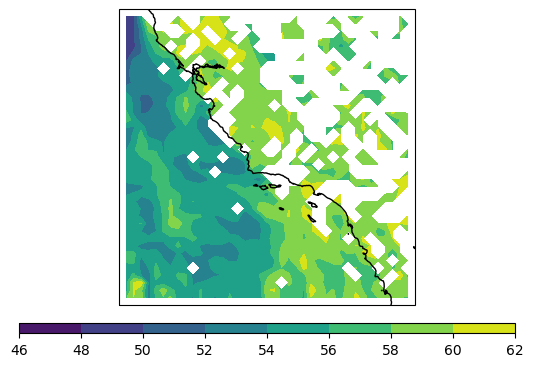

In [15]:
proj=ccrs.PlateCarree()

ax = plt.axes(projection=proj)
ax.add_feature(cfeature.COASTLINE)

contourplot = plt.contourf(fire.fwi.lon,fire.fwi.lat,fire.fwi[10000],add_colorbar=True)
cbar = plt.colorbar(contourplot,orientation='horizontal',pad=0.05,aspect=50,ax=ax)